In [43]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def loading_housing_data():
    tarball_path = Path('datasets/housing.tgz')

    if not tarball_path.is_file():
        Path('datasets').mkdir(parents=True, exist_ok=True)
        url = 'https://github.com/ageron/data/raw/main/housing.tgz'
        urllib.request.urlretrieve(url, tarball_path)

        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path='datasets')

    return pd.read_csv('datasets/housing/housing.csv')

housing = loading_housing_data()
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [45]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [47]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: ylabel='Frequency'>

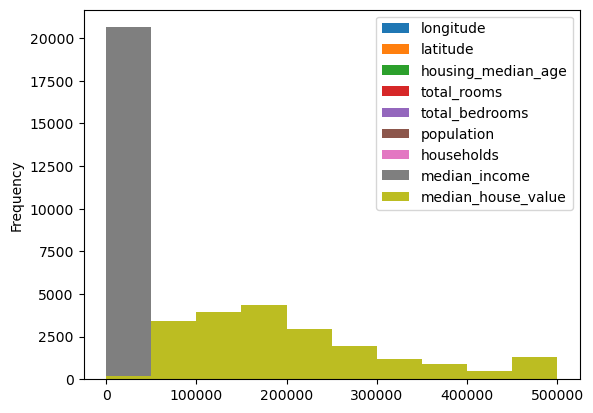

In [60]:
housing.plot(kind='hist')

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

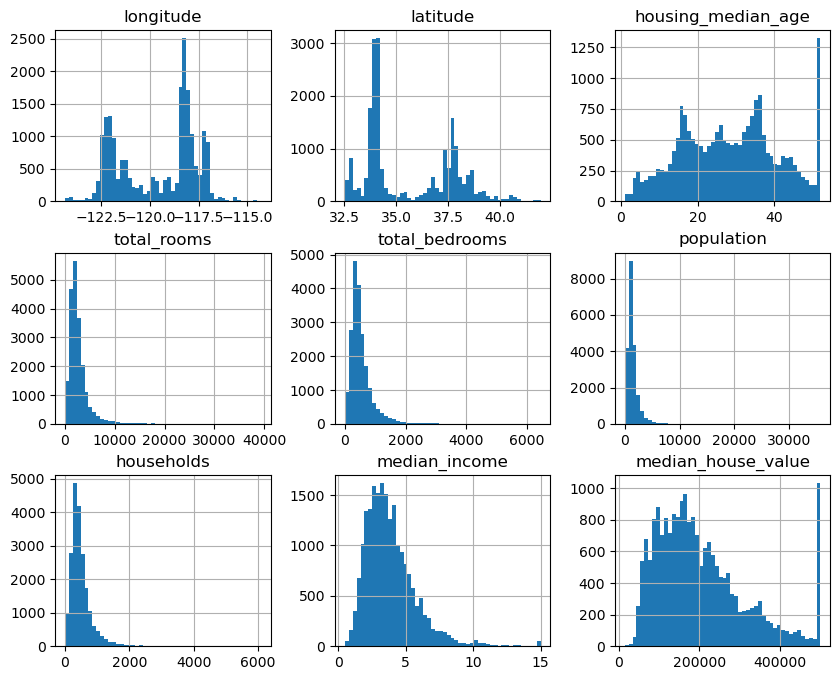

In [61]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(10, 8))

In [64]:
import numpy as np


def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_size = int(len(data) * test_ratio)   # 20 percent of the whole dataset
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]

    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = shuffle_and_split_data(housing, 0.2)

train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5798,-121.40,38.55,26.0,2697.0,398.0,1088.0,389.0,5.0000,142500.0,INLAND
17449,-122.29,38.00,16.0,4986.0,1081.0,2805.0,1016.0,4.0250,173200.0,NEAR BAY
5749,-118.44,34.03,37.0,1193.0,205.0,488.0,224.0,3.6250,357600.0,<1H OCEAN
8503,-120.53,39.79,18.0,1234.0,266.0,543.0,201.0,2.5156,71900.0,INLAND
2913,-121.37,38.61,39.0,823.0,146.0,329.0,144.0,3.0833,114100.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
13797,-118.35,34.09,35.0,2234.0,689.0,1334.0,662.0,2.5444,236100.0,<1H OCEAN
13478,-122.22,37.79,37.0,2343.0,574.0,1608.0,523.0,2.1494,132500.0,NEAR BAY
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
5991,-118.03,34.06,24.0,2469.0,731.0,3818.0,712.0,2.5445,151400.0,<1H OCEAN


In [66]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
9694,-118.33,33.34,52.0,2359.0,591.0,1100.0,431.0,2.8333,414700.0,ISLAND
5873,-122.06,37.86,16.0,5187.0,1014.0,1512.0,986.0,4.4551,252400.0,NEAR BAY
11775,-116.91,32.87,14.0,3048.0,597.0,1690.0,576.0,4.3818,147100.0,<1H OCEAN
6377,-118.09,34.12,45.0,2966.0,415.0,1231.0,409.0,7.8347,500001.0,<1H OCEAN
481,-118.13,33.94,34.0,522.0,138.0,373.0,139.0,3.5481,265000.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
14397,-121.47,38.52,42.0,2316.0,515.0,1597.0,522.0,1.8205,60400.0,INLAND
3971,-114.55,32.80,19.0,2570.0,820.0,1431.0,608.0,1.2750,56100.0,INLAND
10803,-121.10,38.94,42.0,410.0,117.0,706.0,112.0,1.0179,125000.0,INLAND
14331,-119.07,35.42,19.0,3889.0,832.0,1872.0,731.0,2.6812,107600.0,INLAND
